In [22]:
## Importing required libraries

import numpy as np
import tensorflow
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [23]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
#shape of 0th image.

x_train[0].shape

(28, 28)

In [26]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [27]:
# The actual output i.e 500th element is 3 which in turn is dress 

class_names[y_train[500]]

'Dress'

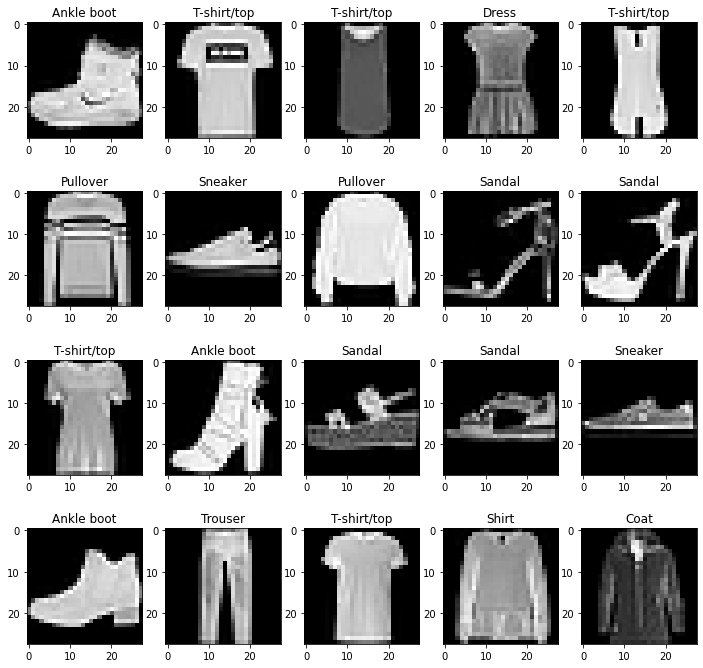

In [28]:
plt.figure(figsize=(12,15))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(class_names[y_train[i]])
plt.show()

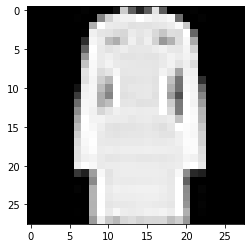

In [29]:
# Here, just as an illustration, we are taking random sample element 500 from the total 60,000 set of images
plt.imshow(x_train[500].reshape(28,28), cmap = 'gray')
plt.show()

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [31]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [32]:
# Here, we are reshaping the input because actual input is in the form of 28*28 image, so we can't directly feed it inot the neural network
# in such form because we feed it into the networks in the form of rows, therefore we need to flatten 28* 28 image into 
# 28*28 = 784 columns.

# This approach is used when we are using ANN's directly without CNN's. In CNN, the reshape will be (1,28,28) as we don't need to 
# input as a flat layer in that case

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [33]:
# We also need to change y because there can be any possibility of a given input to be from 0 to 9. 
# Hence, the columns will be 10 and the rows will be 60,000


y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [34]:
y_train_ohe.shape

(60000, 10)

In [35]:
y_train_ohe

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
x_train[0].shape

(784,)

In [37]:
y_train_ohe[0].shape

(10,)

In [38]:
y_train[0]  # ankle boot

9

In [39]:
#Finally checking the shapes before building the model

print(x_train.shape)
print(x_test.shape)
print(y_train_ohe.shape)
print(y_test_ohe.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


#### Model building

- Model Definition - Architecture of the network (# Hidden layers, # Units)
- Model Compilation - Loss functions, Accuracy Metrics
- Model Train - # Epochs 

In [40]:
#Model Definition
model = Sequential()
model.add(Input(shape = (784,))) # Input Layer

# Overfitting

#model.add(BatchNormalization())
#model.add(Dropout(0.25))
# You can add regularization and/or dropout if your model is overfitting, reduce learning rate, and increase number of epochs


#underfitting

# you can add naother hidden layer with few neurons and activation function if model is underfitting.

model.add(Dense(256, activation = 'relu')) # This is the hidden layer with 256 units/neurons and relu activation function

model.add(Dense(10, activation = 'softmax')) # Output with Softmax as multilabel, dense layer is any general neural network layer

In [41]:
#Compilation
model.compile(optimizer=SGD(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics='accuracy')

In [42]:
# Fitting the data

model.fit(x=x_train,
          y=y_train_ohe,
          batch_size = 50,
          epochs = 10,
          validation_data = (x_test, y_test_ohe))

Epoch 1/10
1200/1200 [==============================] - 2s 2ms/step - loss: 4.9968 - accuracy: 0.6630 - val_loss: 0.9120 - val_accuracy: 0.6899
Epoch 2/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.7588 - accuracy: 0.7101 - val_loss: 0.7437 - val_accuracy: 0.7171
Epoch 3/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.6667 - accuracy: 0.7483 - val_loss: 0.6837 - val_accuracy: 0.7637
Epoch 4/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.5971 - accuracy: 0.7842 - val_loss: 0.7031 - val_accuracy: 0.7546
Epoch 5/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.5556 - accuracy: 0.7987 - val_loss: 0.7097 - val_accuracy: 0.7503
Epoch 6/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.5261 - accuracy: 0.8112 - val_loss: 0.5818 - val_accuracy: 0.8095
Epoch 7/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.5029 - accuracy: 0.8199 - val_loss: 0.5875 - val_accuracy:

In [43]:
## model.history.history provides all the metrics

In [44]:
# Analyzing metrics

train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_accuracy = model.history.history['accuracy']
validation_accuracy = model.history.history['val_accuracy']

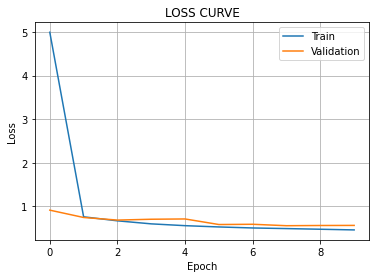

In [45]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

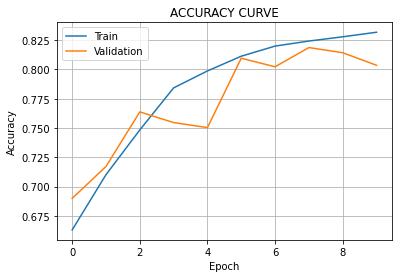

In [46]:
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

In [47]:
## Viewing the image

In [48]:
x_train[10]

array([  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
         0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236,
       216, 187, 149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  66, 185, 166, 180,
       181, 190, 211, 221, 197, 146, 198, 206, 191, 168, 190, 172, 188,
       175,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 135, 153,
       160, 175, 180, 170, 186, 187, 190, 188, 190, 187, 174, 195, 185,
       174, 161, 175,  59,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       161, 147, 160, 170, 178, 177, 180, 168, 173, 174, 171, 185, 184,
       185, 172, 171, 164, 174, 120,   0,   0,   0,   0,   0,   0,   0,
         0,   2, 175, 146, 145, 168, 178, 181, 185, 180, 184, 178, 179,
       187, 191, 193, 190, 181, 171, 172, 158,   0,   0,   0,   0,   0,
         0,   0,   0,  35, 177, 155, 140, 151, 172, 191, 187, 18

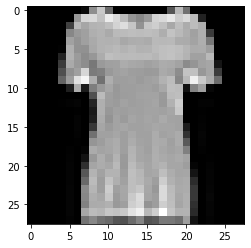

In [49]:
plt.imshow(x_train[10].reshape(28,28),cmap='gray')
plt.show()

In [50]:
y_train[10]

0

In [51]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [52]:
preds= model.predict(x_test)
preds

313/313 [==============================] - 0s 818us/step


array([[1.96157515e-07, 2.36092848e-17, 3.17769471e-15, ...,
        1.10212214e-01, 3.35429289e-11, 8.66677940e-01],
       [1.25651504e-03, 1.98570774e-06, 9.44771886e-01, ...,
        1.75742233e-13, 1.85834253e-07, 1.35261103e-15],
       [5.46296960e-18, 9.99999881e-01, 2.40981210e-19, ...,
        3.70428176e-24, 3.05703827e-23, 2.49575694e-31],
       ...,
       [4.41527163e-06, 1.45753651e-20, 4.38585740e-15, ...,
        6.72446951e-12, 9.99995470e-01, 7.60997664e-30],
       [6.63046712e-25, 9.99998689e-01, 1.15064073e-14, ...,
        1.99503440e-22, 3.48612124e-22, 1.43726139e-35],
       [2.49338633e-10, 4.55444464e-08, 1.79612250e-12, ...,
        8.52547228e-01, 1.39769055e-02, 2.90749893e-02]], dtype=float32)

In [53]:
np.argmax(preds[15]) ## The output of this cell can be compared with the test data images shown in the next to next cell

1

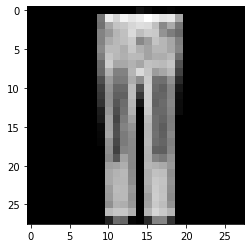

In [54]:
plt.imshow(x_test.reshape(-1,28,28)[15],cmap='gray')
plt.show()

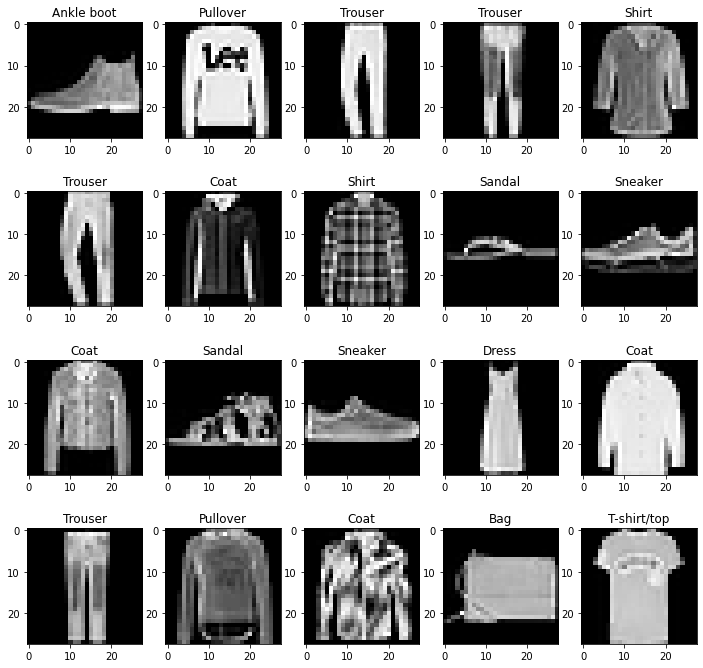

In [55]:
# test data images

plt.figure(figsize=(12,15))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(class_names[y_test[i]])
plt.show()